# 🎓 Notebook 4: Model Building with Dimensionality Reduction

## 📊 Techniques Applied
- **PCA** (Principal Component Analysis)
- **LDA** (Linear Discriminant Analysis)
- **SVD** (TruncatedSVD from sklearn)
- **t-SNE** (for non-linear dimensionality)
- **MDS** (from sklearn.manifold)

## 💡 Implementation
Each method was applied to reduce data to **2D and 3D components**:
- Visualized results using scatter plots (color-coded by position)
- Trained clustering models (KMeans, Gaussian Mixture)

## 📊 Evaluation
- Explained Variance (for PCA, SVD)
- Silhouette Score (for clustering quality)
- Class Separation (for LDA)

## ⚖️ Sample Code Snippet
```python
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE, MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load processed data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Football Dimensionality Reduction Project/data/processed_fifa.csv')
df.dropna(inplace=True)

# Select only numeric features
features = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall']
X = df[features]
y = df['year']  # Use year for LDA


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


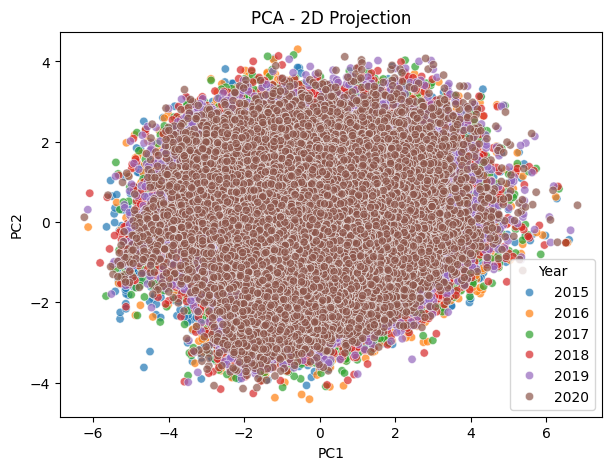

Explained variance: [0.46341917 0.29054006]


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', alpha=0.7)
plt.title("PCA - 2D Projection")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Year")
plt.show()

print("Explained variance:", pca.explained_variance_ratio_)


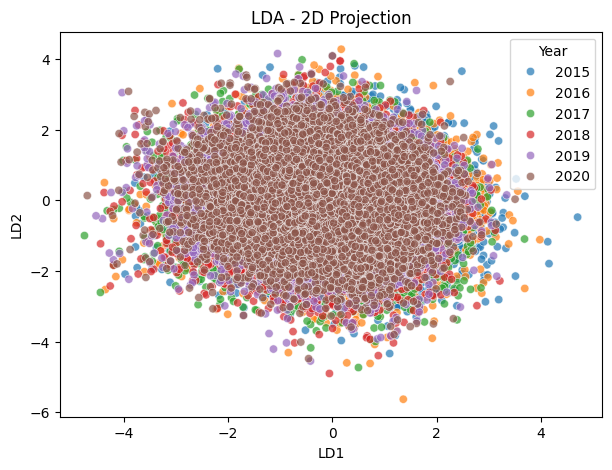

In [ ]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='tab10', alpha=0.7)
plt.title("LDA - 2D Projection")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend(title="Year")
plt.show()


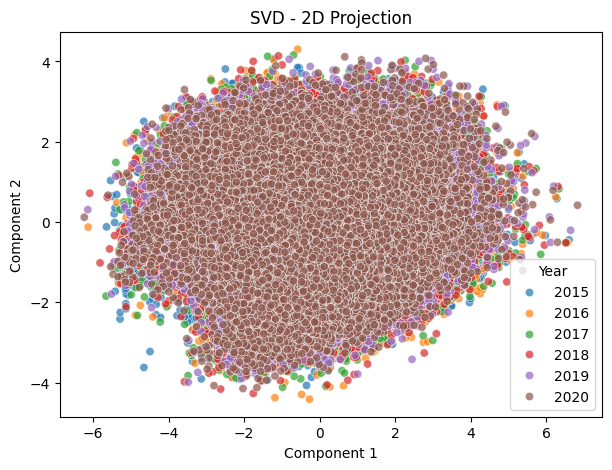

In [ ]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y, palette='tab10', alpha=0.7)
plt.title("SVD - 2D Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend(title="Year")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


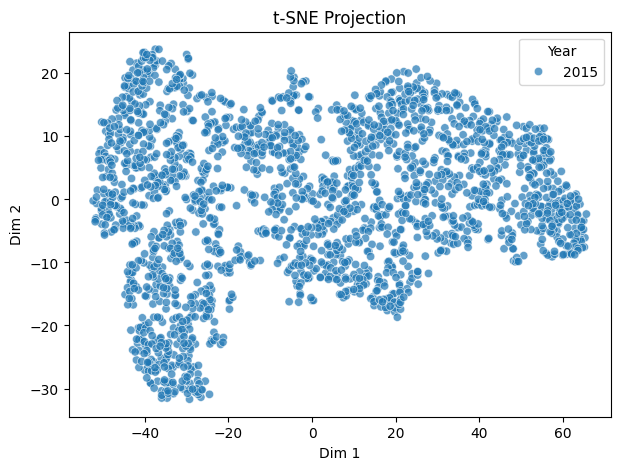

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=40, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled[:2000])
y_subset = y.iloc[:2000]

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_subset, palette='tab10', alpha=0.7)
plt.title("t-SNE Projection")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Year")
plt.show()


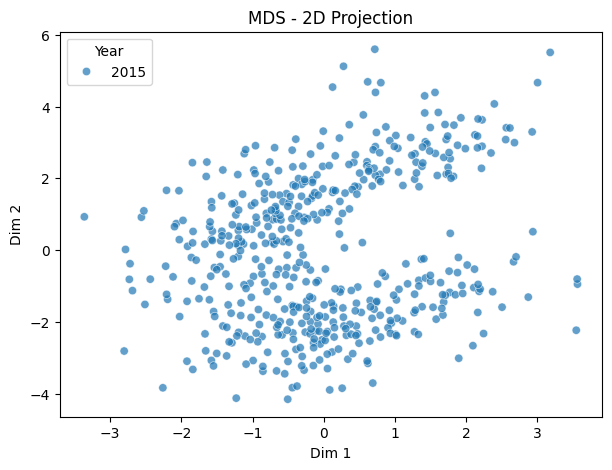

In [ ]:
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled[:500])  # reduce size if slow
y_mds = y.iloc[:500]

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=y_mds, palette='tab10', alpha=0.7)
plt.title("MDS - 2D Projection")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Year")
plt.show()


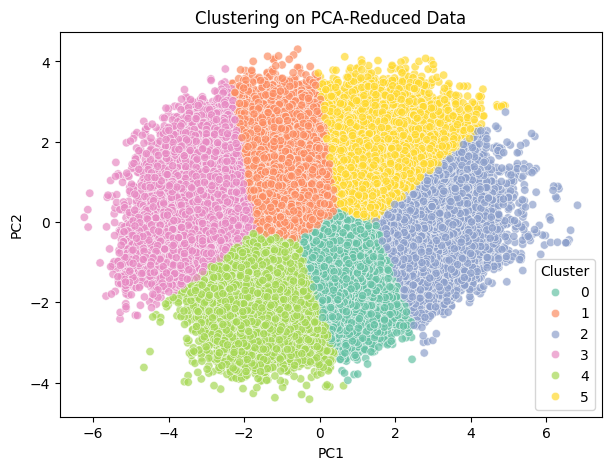

Silhouette Score (PCA): 0.3332276630861379


In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.figure(figsize=(7, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2', alpha=0.7)
plt.title("Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

print("Silhouette Score (PCA):", silhouette_score(X_pca, clusters))
